# Guided Project Star Wars Survey

will be doing data cleaning and analyzing the data by answering some questions. [FiveThirtyEight](http://fivethirtyeight.com/) made a surveyed of Star Wars fans and can be found in their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The data has several columns, including:

- <span style="color:red">RespondentID</span> - An anonymized ID for the respondent (person taking the survey)
- <span style="color:red">Gender</span> - The respondent's gender
- <span style="color:red">Age</span> - The respondent's age
- <span style="color:red">Household Income</span> - The respondent's income
- <span style="color:red">Education</span> - The respondent's education level
- <span style="color:red">Location (Census Region)</span> - The respondent's location
- <span style="color:red">Have you seen any of the 6 films in the Star Wars franchise?</span> - Has a <span style="color:red">Yes</span> or <span style="color:red">No</span> response
- <span style="color:red">Do you consider yourself to be a fan of the Star Wars film franchise?</span> - Has a <span style="color:red">Yes</span> or <span style="color:red">No</span> response

In [1]:
# Importing Libraries
import numpy as np
# Import visual plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the data
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
# Let's check the first 10 rows
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [4]:
# Let's clean the RespondentID by looking and removing NaN values
star_wars['RespondentID'].isnull().sum()

1

In [5]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [6]:
# Check again to see if there's still null values
star_wars['RespondentID'].isnull().sum()

0

In [7]:
# Let's check the columns of two questions in our title
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
# Convert strings Yes and No to booleans of True and False
# Define dic of booleans yes and no
yes_no = {
    "Yes": True,
    "No": False
}
# Conversion
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [10]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [11]:
# Let's check the columns need to be replace
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [12]:
# Make dict columns for renaming
col_renames = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen1',
    'Unnamed: 4': 'seen2',
    'Unnamed: 5': 'seen3',
    'Unnamed: 6': 'seen4',
    'Unnamed: 7': 'seen5',
    'Unnamed: 8': 'seen6'
}
star_wars.rename(columns=col_renames, inplace=True)

In [13]:
star_wars.columns[3:9]

Index(['seen1', 'seen2', 'seen3', 'seen4', 'seen5', 'seen6'], dtype='object')

### Converting values to booleans of the col_renames

In [14]:
star_wars['seen1'].value_counts(dropna=False)

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen1, dtype: int64

In [15]:
seen1_map = {"Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False}
star_wars['seen1'] = star_wars['seen1'].map(seen1_map)
star_wars['seen1'].value_counts()

True     673
False    513
Name: seen1, dtype: int64

In [16]:
star_wars['seen2'].value_counts(dropna=False)

NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen2, dtype: int64

In [17]:
seen2_map = {"Star Wars: Episode II  Attack of the Clones": True,
    np.NaN: False}
star_wars['seen2'] = star_wars['seen2'].map(seen2_map)
star_wars['seen2'].value_counts()

False    615
True     571
Name: seen2, dtype: int64

In [18]:
star_wars['seen3'].value_counts(dropna=False)

NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen3, dtype: int64

In [19]:
seen3_map = {"Star Wars: Episode III  Revenge of the Sith": True,
    np.NaN: False}
star_wars['seen3'] = star_wars['seen3'].map(seen3_map)
star_wars['seen3'].value_counts()

False    636
True     550
Name: seen3, dtype: int64

In [20]:
star_wars['seen4'].value_counts(dropna=False)

Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen4, dtype: int64

In [21]:
seen4_map = {"Star Wars: Episode IV  A New Hope": True,
    np.NaN: False}
star_wars['seen4'] = star_wars['seen4'].map(seen4_map)
star_wars['seen4'].value_counts()

True     607
False    579
Name: seen4, dtype: int64

In [22]:
star_wars['seen5'].value_counts(dropna=False)

Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen5, dtype: int64

In [23]:
seen5_map = {"Star Wars: Episode V The Empire Strikes Back": True,
    np.NaN: False}
star_wars['seen5'] = star_wars['seen5'].map(seen5_map)
star_wars['seen5'].value_counts()

True     758
False    428
Name: seen5, dtype: int64

In [24]:
star_wars['seen6'].value_counts(dropna=False)

Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: seen6, dtype: int64

In [25]:
seen6_map = {"Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False}
star_wars['seen6'] = star_wars['seen6'].map(seen6_map)
star_wars['seen6'].value_counts()

True     738
False    448
Name: seen6, dtype: int64

In [26]:
# Let's check the columns need to be replace
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [27]:
# Make dict columns for renaming
col2_renames = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}
star_wars.rename(columns=col2_renames, inplace=True)

In [28]:
# Convert the datatype of columns 9 to 15
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

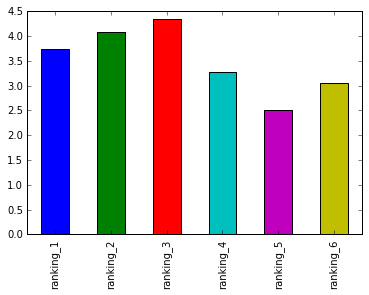

In [29]:
# Grouping the ranking columns
col_rankings = [item for item in star_wars if "ranking" in item]
# Get the values and mean of each ranking
sw_rankings = star_wars[col_rankings].agg(np.mean)
# Make a bar chart of each ranking
sw_rankings.plot.bar()

Based on the chart, the rank 5 which is the first movie is highly rated than the others

In [30]:
star_wars['seen1'].head()

1     True
2    False
3     True
4     True
5     True
Name: seen1, dtype: bool

In [31]:
star_wars['seen1'].value_counts()

True     673
False    513
Name: seen1, dtype: int64

In [32]:
# Get the sum of each seen columns
star_wars[star_wars.columns[3:9]].sum()

seen1    673
seen2    571
seen3    550
seen4    607
seen5    758
seen6    738
dtype: int64

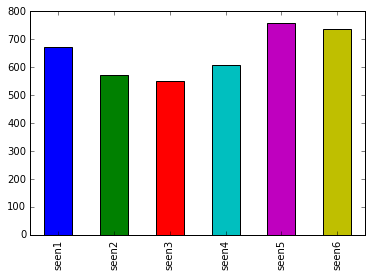

In [33]:
# Visual into bar chart
star_wars[star_wars.columns[3:9]].sum().plot.bar()

Same as the ranking, the original movie has a higher view or seen by the survey.

### Separating the gender and analyze the view and rank by gender

In [34]:
# Create two subsets of male and female from the gender column
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

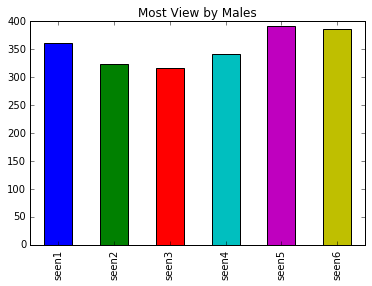

In [35]:
males[males.columns[3:9]].sum().plot.bar(title="Most View by Males")

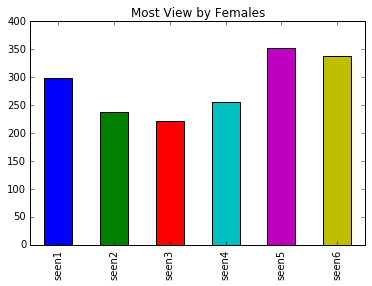

In [36]:
females[females.columns[3:9]].sum().plot.bar(title="Most View by Females")

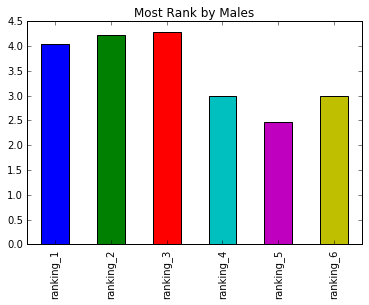

In [37]:
males[males.columns[9:15]].mean().plot.bar(title="Most Rank by Males")

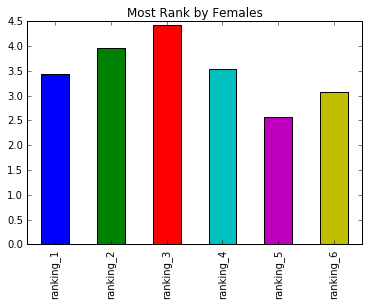

In [38]:
females[females.columns[9:15]].mean().plot.bar(title="Most Rank by Females")

I think the result even though separating by gender is still the same with the overall.